# **1. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score
import pickle
# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# ignore warning
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **2. Load Datasets**

In [ ]:
df = pd.read_csv('Training.csv')
sym_des = pd.read_csv('symtoms_df.csv')
precautions = pd.read_csv('precautions_df.csv')
workout = pd.read_csv('workout_df.csv')
description = pd.read_csv('description.csv')
medications = pd.read_csv('medications.csv')
diets = pd.read_csv('diets.csv')
symptom_severity = pd.read_csv('Symptom-severity.csv')

# **3. Analysing Data**

In [ ]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
df.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [ ]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(4920, 133)

In [ ]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
sym_des.head()

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN


In [ ]:
sym_des.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4920 non-null   int64 
 1   Disease     4920 non-null   object
 2   Symptom_1   4920 non-null   object
 3   Symptom_2   4920 non-null   object
 4   Symptom_3   4920 non-null   object
 5   Symptom_4   4572 non-null   object
dtypes: int64(1), object(5)
memory usage: 230.8+ KB


In [ ]:
precautions.head()

,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [ ]:
precautions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    41 non-null     int64 
 1   Disease       41 non-null     object
 2   Precaution_1  41 non-null     object
 3   Precaution_2  41 non-null     object
 4   Precaution_3  40 non-null     object
 5   Precaution_4  40 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.0+ KB


In [ ]:
workout.head()

,Unnamed: 0.1,Unnamed: 0,disease,workout
0,0,0,Fungal infection,Avoid sugary foods
1,1,1,Fungal infection,Consume probiotics
2,2,2,Fungal infection,Increase intake of garlic
3,3,3,Fungal infection,Include yogurt in diet
4,4,4,Fungal infection,Limit processed foods


In [ ]:
workout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  410 non-null    int64 
 1   Unnamed: 0    410 non-null    int64 
 2   disease       410 non-null    object
 3   workout       410 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.9+ KB


In [ ]:
description.head()

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...


In [ ]:
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 784.0+ bytes


In [ ]:
medications.head()

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."


In [ ]:
medications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     41 non-null     object
 1   Medication  41 non-null     object
dtypes: object(2)
memory usage: 784.0+ bytes


In [ ]:
diets.head()

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."


In [ ]:
diets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Disease  41 non-null     object
 1   Diet     41 non-null     object
dtypes: object(2)
memory usage: 784.0+ bytes


In [ ]:
symptom_severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [ ]:
symptom_severity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
len(df.prognosis.unique())

41

In [ ]:
names = df.prognosis.unique()
names

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
value_counts = df.prognosis.value_counts()
value_counts

,count
prognosis,
Fungal infection,120
Hepatitis C,120
Hepatitis E,120
Alcoholic hepatitis,120
Tuberculosis,120
Common Cold,120
Pneumonia,120
Dimorphic hemmorhoids(piles),120
Heart attack,120


# **4. Pre-processing**

In [ ]:
### Transform Object Columns into Numbers
label = LabelEncoder()
df.prognosis = label.fit_transform(df.prognosis)
df.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [ ]:
### Split
x = df.drop('prognosis',axis=1)
y = df['prognosis']
keys = x.columns
x.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

,prognosis
0,15
1,15
2,15
3,15
4,15


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=41, shuffle =True,stratify=y)
print('X_train shape is ' , x_train.shape)
print('X_test shape is ' , x_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (3936, 132)
X_test shape is  (984, 132)
y_train shape is  (3936,)
y_test shape is  (984,)


# **5. Machine Learning Models**



> **LOGISTIC REGRESSION**




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Train the model on the training set
lr_model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred_lr = lr_model.predict(x_train)
# Make predictions on the testing set
y_test_pred_lr = lr_model.predict(x_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_lr))

# Display confusion matrix and classification report for testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_lr))

Training Accuracy: 1.0
Testing Accuracy: 1.0

Confusion Matrix:
[[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24



> **RANDOM FOREST CLASSIFIER**



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model on the training set
rf_model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred_rf = rf_model.predict(x_train)
# Make predictions on the testing set
y_test_pred_rf = rf_model.predict(x_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_rf))

# Display confusion matrix and classification report for testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rf))

Training Accuracy: 1.0
Testing Accuracy: 1.0

Confusion Matrix:
[[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24



> **SVC**


In [ ]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier model
svc_model = SVC()

# Train the model on the training set
svc_model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred_svc = svc_model.predict(x_train)
# Make predictions on the testing set
y_test_pred_svc = svc_model.predict(x_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_svc))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_svc))

# Display confusion matrix and classification report for testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_svc))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_svc))

Training Accuracy: 1.0
Testing Accuracy: 1.0

Confusion Matrix:
[[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24



> **NAIVE BAYES**



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training set
nb_model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred_nb = nb_model.predict(x_train)
# Make predictions on the testing set
y_test_pred_nb = nb_model.predict(x_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_nb))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_nb))

# Display confusion matrix and classification report for testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_nb))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_nb))

Training Accuracy: 1.0
Testing Accuracy: 1.0

Confusion Matrix:
[[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24

> **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()

# Train the model on the training set
gb_model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred_gb = gb_model.predict(x_train)
# Make predictions on the testing set
y_test_pred_gb = gb_model.predict(x_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_gb))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_gb))

# Display confusion matrix and classification report for testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_gb))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_gb))

Training Accuracy: 1.0
Testing Accuracy: 1.0

Confusion Matrix:
[[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24

# **6. Model Evaluation**

In [ ]:
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'Naive Bayes': nb_model

}
### Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}\n")

Cross-validating RandomForest...
Mean accuracy for RandomForest: 1.0000

Cross-validating XGBoost...
Mean accuracy for XGBoost: 1.0000

Cross-validating LGBM...
Mean accuracy for LGBM: 1.0000

Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.9982

Cross-validating KNN...
Mean accuracy for KNN: 1.0000

Cross-validating SVC...
Mean accuracy for SVC: 1.0000

Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 1.0000

Cross-validating Naive Bayes...
Mean accuracy for Naive Bayes: 1.0000



In [ ]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
0,RandomForest,1.000000
1,XGBoost,1.000000
2,LGBM,1.000000
4,KNN,1.000000
5,SVC,1.000000
6,LogisticRegression,1.000000
7,Naive Bayes,1.000000
3,DecisionTree,0.998221


In [ ]:
best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: RandomForest


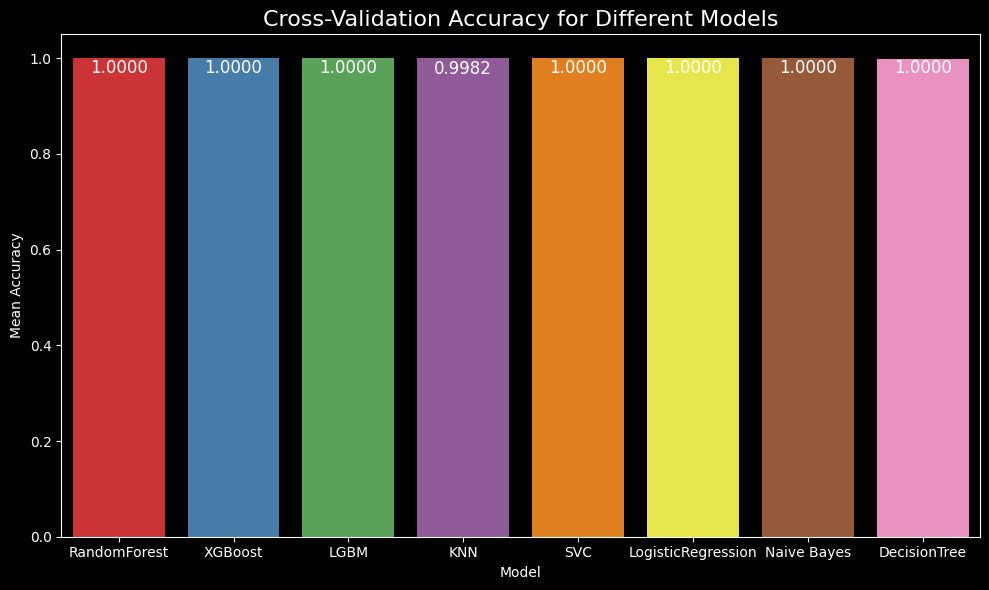

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.barplot(data=cv_results_df, x='Model', y='Mean Accuracy', palette="Set1")
plt.title('Cross-Validation Accuracy for Different Models', fontsize=16, color='white')
plt.xlabel('Model', color='white')
plt.ylabel('Mean Accuracy', color='white')
for index, row in cv_results_df.iterrows():
    plt.text(index, row['Mean Accuracy'] - 0.02, f'{row["Mean Accuracy"]:.4f}',
             color='white', ha="center", va="center", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
### Evaluate the model
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred,average='micro')
train_recall = recall_score(y_train, y_train_pred,average='micro')
train_f1 = f1_score(y_train, y_train_pred,average='micro')
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred,average='micro')
test_recall = recall_score(y_test, y_test_pred,average='micro')
test_f1 = f1_score(y_test, y_test_pred,average='micro')
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-Score: {train_f1:.2f}')
print('---')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1-Score: {test_f1:.2f}')

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-Score: 1.00
---
Test Accuracy: 1.00
Test Precision: 1.00
Test Recall: 1.00
Test F1-Score: 1.00


Confusion Matrix is : 
 [[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]


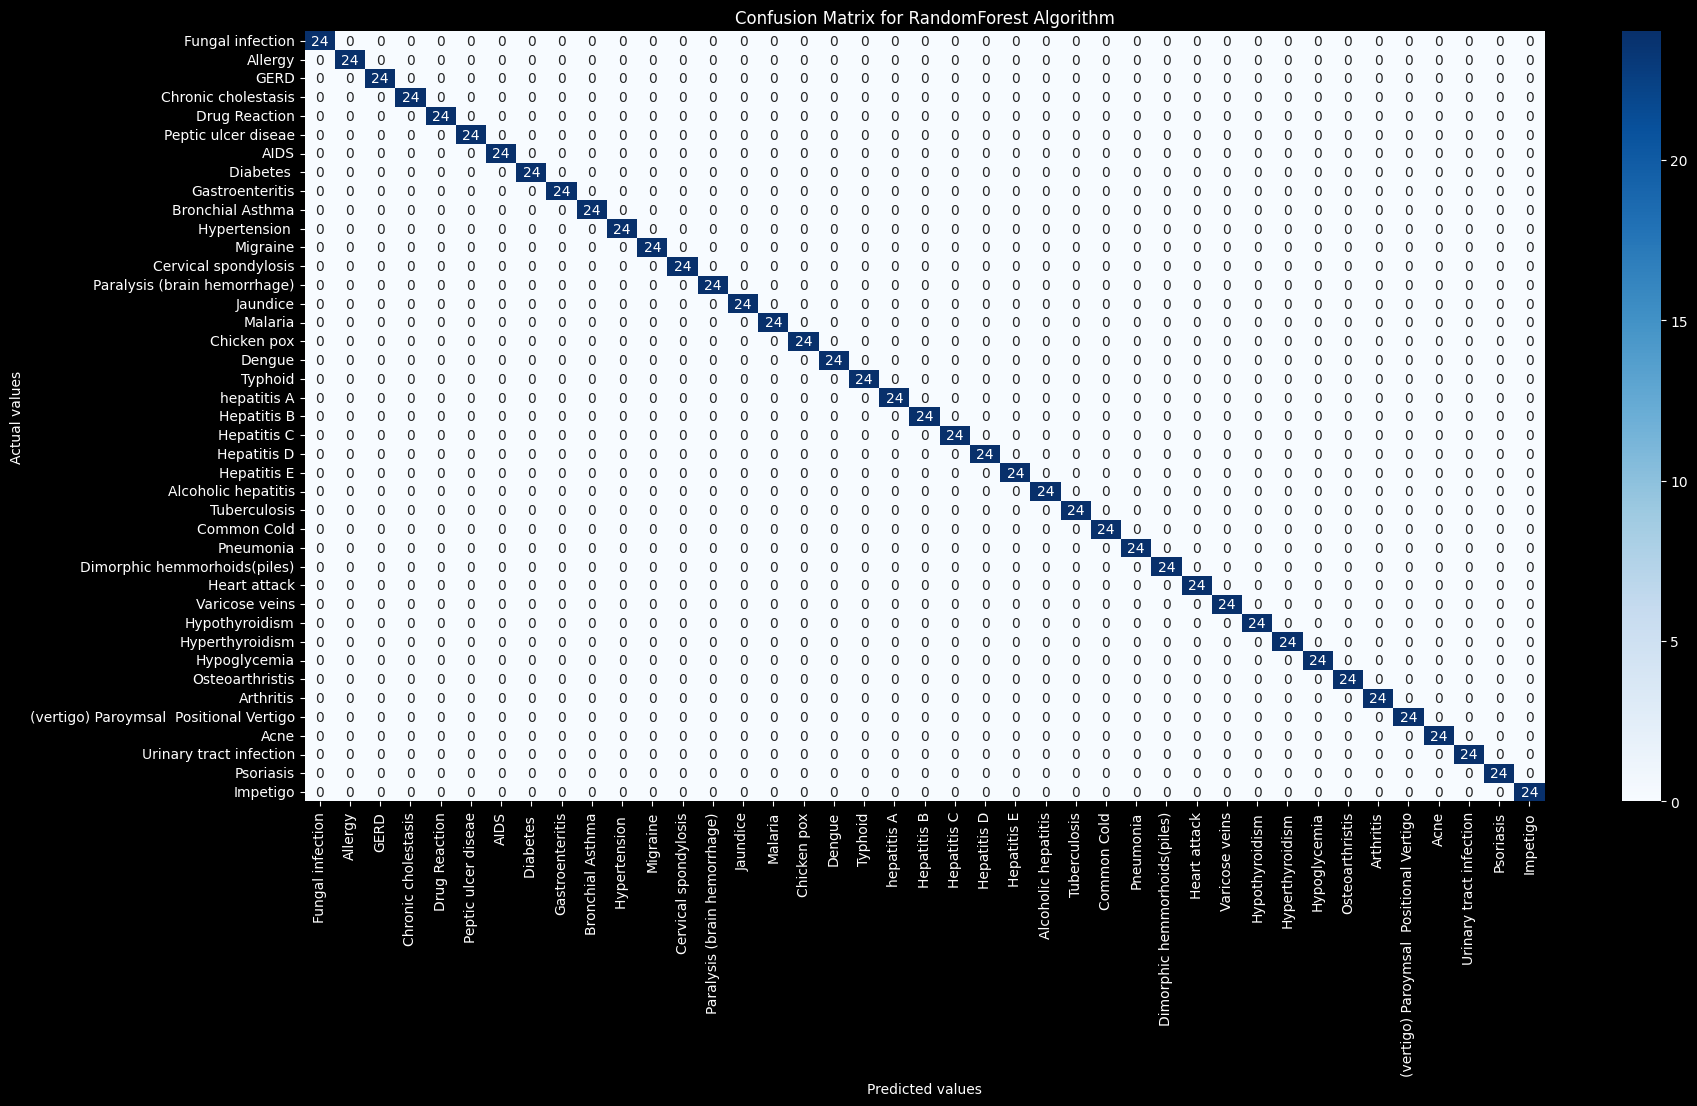

In [ ]:
### Check model
CM = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix is : \n', CM)
plt.figure(figsize=(20,10))
sns.heatmap(data=CM, annot=True,fmt='g', cmap="Blues", xticklabels=names, yticklabels=names)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title(f'Confusion Matrix for {best_model_name} Algorithm')
plt.show()

In [ ]:
ClassificationReport = classification_report(y_test,y_test_pred,target_names=names)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                                           precision    recall  f1-score   support

                       Fungal infection       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                                   GERD       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                          Drug Reaction       1.00      1.00      1.00        24
                    Peptic ulcer diseae       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                              Diabetes        1.00      1.00      1.00        24
                        Gastroenteritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                          Hypertension        1.00      1.00      1.00        24

In [ ]:
pickle.dump(model,open('random.pkl','wb'))

# **7. Recommendation System**

In [ ]:
symptoms_dict = {}
diseases_list = {}
for name in names:
    diseases_list[label.transform([name])[0]] = name
with open('diseases_list.pkl', 'wb') as f:
    pickle.dump(diseases_list, f)
for i,name in enumerate(keys):
    symptoms_dict[name] = i
with open('symptoms_dict.pkl', 'wb') as f:
    pickle.dump(symptoms_dict, f)
print('******************* Symptoms_dict *****************\n\n',symptoms_dict)
print('\n\n******************* Diseases_list *****************\n\n',diseases_list)

******************* Symptoms_dict *****************

 {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 

In [ ]:
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[model.predict([input_vector])[0]]

In [ ]:
symptoms = 'inflammatory_nails, blister, red_sore_around_nose, yellow_crust_ooze'
user_symptoms = [s.strip() for s in symptoms.split(',')]

predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("================= Predicted Disease ============\n")
print(predicted_disease)
print("\n================= Description ==================\n")
print(desc)
print("\n================= Precautions ==================\n")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("\n================= Medications ==================\n")
i = 1
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("\n================= Workout ==================\n")
i = 1
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("\n================= Diets ==================\n")
i = 1
for d_i in die:
    print(i, ": ", d_i)
    i += 1

================= Predicted Disease ============

Impetigo

================= Description ==================

Impetigo is a highly contagious skin infection causing red sores that can break open.

================= Precautions ==================

1 :  soak affected area in warm water
2 :  use antibiotics
3 :  remove scabs with wet compressed cloth
4 :  consult doctor

================= Medications ==================

1 :  ['Topical antibiotics', 'Oral antibiotics', 'Antiseptics', 'Ointments', 'Warm compresses']

================= Workout ==================

1 :  Maintain good hygiene
2 :  Stay hydrated
3 :  Consume nutrient-rich foods
4 :  Limit sugary foods and beverages
5 :  Include foods rich in vitamin C
6 :  Consult a healthcare professional
7 :  Follow medical recommendations
8 :  Avoid scratching
9 :  Take prescribed antibiotics
10 :  Practice wound care

================= Diets ==================

1 :  ['Impetigo Diet', 'Antibiotic treatment', 'Fruits and vegetables', 'Hydratio

In [ ]:
symptoms = 'redness_of_eyes, sinus_pressure, runny_nose, congestion'
user_symptoms = [s.strip() for s in symptoms.split(',')]

predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("================= Predicted Disease ============\n")
print(predicted_disease)
print("\n================= Description ==================\n")
print(desc)
print("\n================= Precautions ==================\n")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("\n================= Medications ==================\n")
i = 1
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("\n================= Workout ==================\n")
i = 1
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("\n================= Diets ==================\n")
i = 1
for d_i in die:
    print(i, ": ", d_i)
    i += 1

================= Predicted Disease ============

Fungal infection

================= Description ==================

Fungal infection is a common skin condition caused by fungi.

================= Precautions ==================

1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths

================= Medications ==================

1 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']

================= Workout ==================

1 :  Avoid sugary foods
2 :  Consume probiotics
3 :  Increase intake of garlic
4 :  Include yogurt in diet
5 :  Limit processed foods
6 :  Stay hydrated
7 :  Consume green tea
8 :  Eat foods rich in zinc
9 :  Include turmeric in diet
10 :  Eat fruits and vegetables

================= Diets ==================

1 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


In [ ]:
symptoms = 'shivering, acidity, vomiting'
user_symptoms = [s.strip() for s in symptoms.split(',')]

predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("================= Predicted Disease ============\n")
print(predicted_disease)
print("\n================= Description ==================\n")
print(desc)
print("\n================= Precautions ==================\n")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("\n================= Medications ==================\n")
i = 1
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("\n================= Workout ==================\n")
i = 1
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("\n================= Diets ==================\n")
i = 1
for d_i in die:
    print(i, ": ", d_i)
    i += 1

================= Predicted Disease ============

GERD

================= Description ==================

GERD (Gastroesophageal Reflux Disease) is a digestive disorder that affects the lower esophageal sphincter.

================= Precautions ==================

1 :  avoid fatty spicy food
2 :  avoid lying down after eating
3 :  maintain healthy weight
4 :  exercise

================= Medications ==================

1 :  ['Proton Pump Inhibitors (PPIs)', 'H2 Blockers', 'Antacids', 'Prokinetics', 'Antibiotics']

================= Workout ==================

1 :  Consume smaller meals
2 :  Avoid trigger foods (spicy, fatty)
3 :  Eat high-fiber foods
4 :  Limit caffeine and alcohol
5 :  Chew food thoroughly
6 :  Avoid late-night eating
7 :  Consume non-citrus fruits
8 :  Include lean proteins
9 :  Stay hydrated
10 :  Avoid carbonated beverages

================= Diets ==================

1 :  ['Low-Acid Diet', 'Fiber-rich foods', 'Ginger', 'Licorice', 'Aloe vera juice']


In [ ]:
symptoms = 'congestion , chest_pain , breathlessness'
user_symptoms = [s.strip() for s in symptoms.split(',')]

predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("================= Predicted Disease ============\n")
print(predicted_disease)
print("\n================= Description ==================\n")
print(desc)
print("\n================= Precautions ==================\n")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("\n================= Medications ==================\n")
i = 1
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("\n================= Workout ==================\n")
i = 1
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("\n================= Diets ==================\n")
i = 1
for d_i in die:
    print(i, ": ", d_i)
    i += 1

================= Predicted Disease ============

Heart attack

================= Description ==================

Heart attack is a sudden and severe reduction in blood flow to the heart muscle.

================= Precautions ==================

1 :  call ambulance
2 :  chew or swallow asprin
3 :  keep calm
4 :  nan

================= Medications ==================

1 :  ['Compression stockings', 'Exercise', 'Elevating the legs', 'Sclerotherapy', 'Laser treatments']

================= Workout ==================

1 :  Follow a heart-healthy diet
2 :  Limit sodium intake
3 :  Include fiber-rich foods
4 :  Consume healthy fats
5 :  Include lean proteins
6 :  Limit sugary foods and beverages
7 :  Stay hydrated
8 :  Consult a healthcare professional
9 :  Follow medical recommendations
10 :  Engage in regular exercise

================= Diets ==================

1 :  ['Heart-Healthy Diet', 'Low-sodium foods', 'Fruits and vegetables', 'Whole grains', 'Lean proteins']
